# Assignment 1
This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.

### Environment setup

The following code reads the train and test data (provided along with this template) and outputs the data and labels as numpy arrays. Use these variables in your code.

---
#### Note on conventions
In mathematical notation, the convention is tha data matrices are column-indexed, which means that a input data $x$ has shape $[d, n]$, where $d$ is the number of dimensions and $n$ is the number of data points, respectively.

Programming languages have a slightly different convention. Data matrices are of shape $[n, d]$. This has the benefit of being able to access the ith data point as a simple `data[i]`.

What this means is that you need to be careful about your handling of matrix dimensions. For example, while the covariance matrix (of shape $[d,d]$) for input data $x$ is calculated as $(x-u)(x-u)^T$, while programming you would do $(x-u)^T(x-u)$ to get the correct output shapes.

In [2]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


In [3]:
from numpy import linalg as LA
from math import log,pi
%matplotlib inline

# Questions
---
## 1.3.1 Representation
The next code cells, when run, should plot the eigen value spectrum of the covariance matrices corresponding to the mentioned samples. Normalize the eigen value spectrum and only show the first 100 values.

Number of samples : (600, 784)
Non zero eigen values : (544,)
520


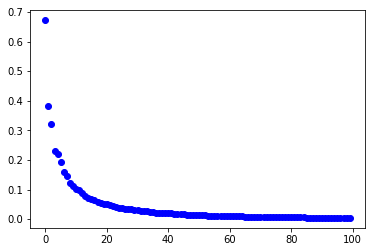

In [11]:
# Samples corresponding to the last digit of your roll number (plot a)
# The last digit of my roll number is 2 (20171062)

# Getting samples from the training set where label = 2
data_label2 = train_data[train_labels==2]
print("Number of samples :",data_label2.shape)
cov_mat = np.cov(data_label2.transpose())
eigenvalues,eigenvectors = LA.eig(cov_mat)
sortedeig = np.sort(eigenvalues.real)[::-1]
normsorted = sortedeig/LA.norm(sortedeig)
print("Non zero eigen values :",eigenvalues[eigenvalues.real!=0].shape)
print(LA.matrix_rank(cov_mat))
plt.plot(normsorted[:100],"bo")

Number of samples : (600, 784)
Non zero eigen values : (508,)
488


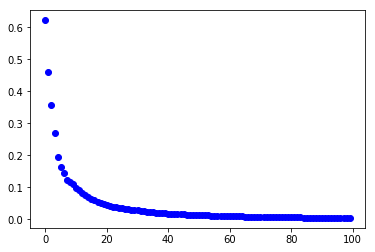

In [12]:
# Samples corresponding to the last digit of (your roll number + 1) % 10 (plot b)
data_label3 = train_data[train_labels==3]
print("Number of samples :",data_label3.shape)
cov_mat = np.cov(data_label3.transpose())
eigenvalues,eigenvectors = LA.eig(cov_mat)
sortedeig = np.sort(eigenvalues.real)[::-1]
normsorted = sortedeig/LA.norm(sortedeig)
print("Non zero eigen values :",eigenvalues[eigenvalues.real!=0].shape)
print(LA.matrix_rank(cov_mat))
plt.plot(normsorted[:100],"bo")

Non zero eigen values : (667,)
658


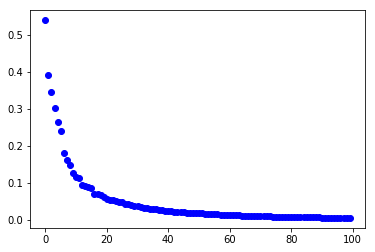

In [13]:
# All training data (plot c)
cov_mat = np.cov(train_data.transpose())
eigenvalues,eigenvectors = LA.eig(cov_mat)
sortedeig = np.sort(eigenvalues.real)[::-1]
normsorted = sortedeig/LA.norm(sortedeig)
print("Non zero eigen values :",eigenvalues[eigenvalues.real!=0].shape)
print(LA.matrix_rank(cov_mat))
plt.plot(normsorted[:100],"bo")

(3000, 784)
Non zero eigen values : (651,)
622


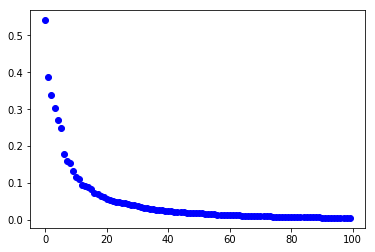

In [10]:
# Randomly selected 50% of the training data (plot d)
# mask = np.random.choice([False, True], 6000, p=[0.5, 0.5])
data_half = train_data[np.random.randint(train_data.shape[0], size=3000), :]
print(data_half.shape)
cov_mat = np.cov(data_half.transpose())
eigenvalues,eigenvectors = LA.eig(cov_mat)
sortedeig = np.sort(eigenvalues.real)[::-1]
normsorted = sortedeig/LA.norm(sortedeig)
print("Non zero eigen values :",eigenvalues[eigenvalues.real!=0].shape)
print(LA.matrix_rank(cov_mat))
plt.plot(normsorted[:100],"bo")

### 1.3.1 Question 1
- Are plots a and b different? Why?
- Are plots b and c different? Why?
- What are the approximate ranks of each plot?

---
Q) Are plots a and b different? Why?
- Yes, they are slightly different, but only upon taking a close look. This is because pixel intensities of the two matrix classes taken(basically the 784 dimensional vector) in a and b are different as they represent different numbers, this in turn leads to each of the classes having a different covariance matrix, and thus different eigen values. 

Q) Are plots b and c different? Why? 
- Yes, these plots are significantly different because the c represents pixel intensities across all classes, while b is of one particular class.

Q) What are the approximate ranks of each plot?
- Considering eigenvalues above or very close to 0.2

  Approximate ranks are as follows : 
a) 5
b) 5 
c) 6 
d) 6

---

### 1.3.1 Question 2
- How many possible images could there be?
- What percentage is accessible to us as MNIST data?
- If we had acces to all the data, how would the eigen value spectrum of the covariance matrix look?

---
There are 2<sup>784</sup> possible images. As each pixel can be either 0 or 1, we have 2 choices for each pixel and 784 pixels to be filled.
That is basically (7000/2<sup>784</sup>) * 100 = 6.879889127682485e-231 percent, available to us as MNIST data.
<br/>
If we had access to all data, there would be distribution in all directions. So we would have eigenvectors in all directions with nearly same eigenvalues, which after normalization would all become near to 1.

---

## 1.3.2 Linear Transformation
---
### 1.3.2 Question 1
How does the eigen spectrum change if the original data was multiplied by an orthonormal matrix? Answer analytically and then also validate experimentally.

---
Lets assume for convenience that the data has zero mean. Let data be X (n * d).<br/>
Now we multiply an orthonormal matrix, say M to X. So the transformed data is XM.<br/>
As orthonormal transformations preserve lengths, mean remains zero.<br/>
Now covariance matrix of the original data was XX<sup>T</sup><br/>
C = XX<sup>T</sup> = VLV<sup>-1</sup> by eigendecomposition and where V is the matrix of eigenvectors and L is the matrix with eigenvalues as diagonal values.<br/>
Now covariance of the new data C' is<br/>
C' = (XM)(XM)<sup>T</sup> = XMM<sup>T</sup>X<sup>T</sup> = XX<sup>T</sup> as MM<sup>T</sup> = I (orthonormal matrix).<br/>
so C' = C<br/>
Hence the eigenvalue spectrum remains the same.

---

Non zero eigen values : (784,)
658


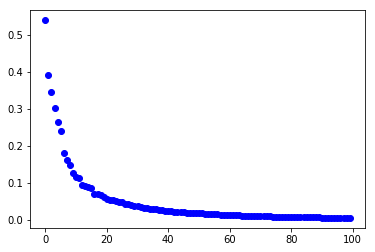

In [15]:
# Experimental validation here.
# Multiply your data (train_data) with an orthonormal matrix and plot the
# eigen value specturm of the new covariance matrix.
# code goes here
temp = np.random.rand(784,784)
q,r = LA.qr(temp)
trans_data = np.matmul(train_data,q)
cov_mat = np.cov(trans_data.transpose())
eigenvalues,eigenvectors = LA.eig(cov_mat)
sortedeig = np.sort(eigenvalues.real)[::-1]
normsorted_trans = sortedeig/LA.norm(sortedeig)
print("Non zero eigen values :",eigenvalues[eigenvalues.real!=0].shape)
print(LA.matrix_rank(cov_mat))
plt.plot(normsorted[:100],"bo")

In [8]:
np.sqrt(np.sum((normsorted_trans - normsorted)**2))

0.035652831523812614

### 1.3.2 Question 2
If  samples  were  multiplied  by  784 × 784  matrix  of rank 1 or 2, (rank deficient matrices), how will the eigen spectrum look like?

---
Assuming data has zero mean for convenience.
Suppose our data is multiplied with a low rank matrix R with say rank p.<br/>
Now, let our new data be X' = XR</br>
Also rank of X' will now be less than or equal to p.( `rank(AB)<=min(rank(A),rank(B))` )<br/>
Now using SVD we can write X' = U$\sum$V<sup>T</sup> in which there will be atmost p nonzero singular values in $\sum$ as number of nonzero singular values is the rank of the matrix. Also, U and V are orthogonal matrices.<br/>

Now covariance matrix C' = X'X'<sup>T</sup> = (U$\sum$V<sup>T</sup>)(U$\sum$V<sup>T</sup>)<sup>T</sup> <br/>
= U$\sum$V<sup>T</sup>V$\sum$<sup>T</sup>U<sup>T</sup> = U$\sum$$\sum$<sup>T</sup>U<sup>T</sup> = UPU<sup>-1</sup><br/> which is eigendecomposition of C'
Now P = $\sum$$\sum$<sup>T</sup> will be a diagonal matrix with atmost p non zero diagonal values, which is the rank of the covariance matrix. So the eigenspectrum will have atmost p non zero eigenvalues.

Hence, when p is 1 or 2 the eigenspectrum will have a max of 1 or 2 nonzero eigenvalues respectively.

---

### 1.3.2 Question 3
Project the original data into the first and second eigenvectors and plot in 2D

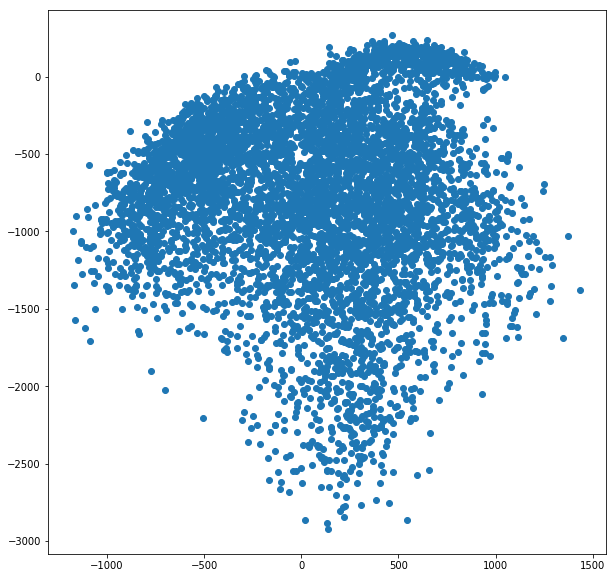

In [21]:
# Plotting code here
train_data.shape
train_datax = train_data - train_data.mean(axis=0)         
C = np.cov(train_datax.transpose())    
eigvals, eigvecs = LA.eigh(C)
eigvals = eigvals[::-1]
eigvecs = eigvecs.T[::-1]
pc2d = eigvecs[:2,:]
projected_data = np.dot(train_data, pc2d.T )
projected_data.shape
plt.figure(figsize=(10,10))
plt.scatter(projected_data[:,1],projected_data[:,0])

## 1.3.3 Probabilistic View
---
In this section you will classify the test set by fitting multivariate gaussians on the train set, with different choices for decision boundaries. On running, your code should print the accuracy on your test set.

In [68]:
# Print accuracy on the test set using MLE

covmat_list = []
mean_list = []
invcov_list = []
eigval_list = []
logdet_list = []
N = 600
k = 784
correct = 0

for i in range(10):
    class_data = train_data[train_labels==i]
    class_mean = np.mean(class_data,0)
    mean_list.append(class_mean)
    class_cov = np.matmul((class_data-class_mean).T, (class_data-class_mean))/N
    covmat_list.append(class_cov)
    invcov_list.append(LA.pinv(class_cov))
    eigvals,_ = LA.eig(class_cov)
    eigval_list.append(eigvals)
    log_det = 0
    for k in range(eigvals.shape[0]):
            if eigvals[k].real > 0 :
                log_det += log(eigvals[k].real)
    logdet_list.append(log_det)            
    
    
covmat_list = np.array(covmat_list)   
mean_list = np.array(mean_list)
invcov_list = np.array(invcov_list)
logdet_list = np.array(logdet_list)
    
for j in range(1000):
    predictions = []
    for i in range(10):
        prob = -0.5*(((test_data[j]-mean_list[i]).T)@(invcov_list[i])@(test_data[j]-mean_list[i])) - 0.5*(k*log(2*pi)+logdet_list[i])
        predictions.append(prob)
    predicted_class = np.argmax(predictions)
    if predicted_class == test_labels[j]:
        correct+=1
        
print(correct/10)

74.3


In [69]:
# Print accuracy on the test set using MAP
# (assume a reasonable prior and mention it in the comments)

covmat_list = []
mean_list = []
invcov_list = []
eigval_list = []
logdet_list = []
N = 600
k = 784
correct = 0

for i in range(10):
    class_data = train_data[train_labels==i]
    class_mean = np.mean(class_data,0)
    mean_list.append(class_mean)
    class_cov = np.matmul((class_data-class_mean).T, (class_data-class_mean))/N
    covmat_list.append(class_cov)
    invcov_list.append(LA.pinv(class_cov))
    eigvals,_ = LA.eig(class_cov)
    eigval_list.append(eigvals)
    log_det = 0
    for k in range(eigvals.shape[0]):
            if eigvals[k].real > 0 :
                log_det += log(eigvals[k].real)
    logdet_list.append(log_det)            
    
    
covmat_list = np.array(covmat_list)   
mean_list = np.array(mean_list)
invcov_list = np.array(invcov_list)
logdet_list = np.array(logdet_list)
    
for j in range(1000):
    predictions = []
    for i in range(10):
        prob = -0.5*(((test_data[j]-mean_list[i]).T)@(invcov_list[i])@(test_data[j]-mean_list[i])) - 0.5*(k*log(2*pi)+logdet_list[i])-log(10)
        predictions.append(prob)
    predicted_class = np.argmax(predictions)
    if predicted_class == test_labels[j]:
        correct+=1
        
print(correct/10)

74.3


In [5]:
# Print accuracy using Bayesian pairwise majority voting method
covmat_list = []
mean_list = []

avgcovmat_list = []
invcov_list = []
logdet_list = []

N = 600
k = 784
correct = 0

for i in range(10):
    class_data = train_data[train_labels==i]
    class_mean = np.mean(class_data,0)
    mean_list.append(class_mean)
    class_cov = np.matmul((class_data-class_mean).T, (class_data-class_mean))/N
    covmat_list.append(class_cov)    
covmat_list = np.array(covmat_list)   
mean_list = np.array(mean_list)

iters = [0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0]    
combinations = [] 
for i in range(len(iters)):
    for j in range(i,len(iters)):
        combinations.append([i,j])

for com in combinations:
    covmat = (covmat_list[com[0]]+covmat_list[com[1]])/2
    invcov = LA.pinv(covmat)
    eigvals,_ = LA.eig(covmat)
    log_det = 0
    for k in range(eigvals.shape[0]):
        if eigvals[k].real > 0 :
            log_det += log(eigvals[k].real)
    avgcovmat_list.append(covmat)
    invcov_list.append(invcov)
    logdet_list.append(log_det)
    

for j in range(1000):
    votes = []
    for i,com in enumerate(combinations):
        m1 = mean_list[com[0]]
        m2 = mean_list[com[1]]
        invcov = invcov_list[i]
        log_det = logdet_list[i]
        
        p1 = -0.5*((test_data[j]-m1.T)@(invcov)@(test_data[j]-m1)) - 0.5*(k*log(2*pi)+log_det)
        p2 = -0.5*((test_data[j]-m2.T)@(invcov)@(test_data[j]-m2)) - 0.5*(k*log(2*pi)+log_det)
        if p1>=p2:
            votes.append(com[0])
        else:
            votes.append(com[1])
    prediction = np.argmax(np.bincount(votes))       
    if prediction == test_labels[j]:
        correct+=1    
        
print(correct/10)

83.8


In [7]:
# Print accuracy using Simple Perpendicular Bisector majority voting method
mean_list = []
N = 600
correct = 0

iters = [0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0]    
combinations = [] 
for i in range(len(iters)):
    for j in range(i,len(iters)):
        combinations.append([i,j])

for i in range(10):
    class_data = train_data[train_labels==i]
    mean_list.append(np.mean(class_data,0))

for j in range(1000):
    votes = []
    for com in combinations:
        m1 = mean_list[com[0]]
        m2 = mean_list[com[1]]
        p1 = LA.norm(test_data[j]-m1)
        p2 = LA.norm(test_data[j]-m2)
        if p1<p2:
            votes.append(com[0])
        else:
            votes.append(com[1])
    prediction = np.argmax(np.bincount(votes))          
    if prediction == test_labels[j]:
        correct+=1
        
print(correct/10)        

77.0


### 1.3.3 Question 4
Compare performances and salient observations

---

* `MLE has a bad performance (accuracy = 74.3) since the estimation is based on the information received from the training set. The parameters` $\mu$ `and` $\Sigma$ `for the 2-D Gaussian curve are fixed based on the training set. The parameters are not tuned to any data from the test set. Therefore, as a result of overfitting on the training set/less generality, the accuracy is low. If the training set would have been a better representative of the overall distribution of data samples, accuracy would have been better for test set also.`

_Prior for MAP : $\frac{1}{10}$ as there are are 10 classes of digits and all digits are equally probable_

* `MAP has accuracy similar to MLE(accuracy = 74.3) due to similar reasons. The priori assumption does not have an affect on the accuracy since it gives equal probability to all classes.`


* `Pairwise bayesian method has the best accuracy (accuracy = 83.8) across all methods. It uses a common sigma value, and unique mean value for any pair of classes. This takes into consideration the means of the classes and also the covariance(though averaged), hence the spread of the data gets accounted for too. Doing a majority vote across all classes reduces error (in classification) as much as possible hence gaining more accuracy than MLE and MAP.`


* `Perpendicular bisector method has a little better performance (accuracy = 77) as compared to MLE and MAP but lesser than Pairwise bayesian method. Since it uses only distance of the mean point of every class, it does not incorporate sufficient information about the spread of the data in each class, as` $\Sigma$ `is not considered, hence has lesser accuracy than Pairwise Bayesian. Doing a majority vote across all classes reduces error (in classification) as much as possible hence gaining more accuracy than MLE and MAP.`

---

## 1.3.4 Nearest Neighbour based Tasks and Design
---
### 1.3.4 Question 1 : NN Classification with various K
Implement a KNN classifier and print accuracies on the test set with K=1,3,7

In [14]:
# Your code here
# Print accuracies with K = 1, 3, 7
def knn(k,train_data,test_data,train_labels,test_labels):
    nsamples = test_labels.shape[0]
    ndata = train_labels.shape[0]
    predictions = np.zeros(nsamples,dtype=np.float64)
    for i in range(nsamples):
        distances = np.zeros(ndata)
        for j in range(ndata):
            distances[j] = np.sqrt(np.sum(np.square(test_data[i,:]-train_data[j,:])))
        indices = np.argsort(distances)[:k]
        votes = np.array(train_labels)[indices].astype(int)
        predictions[i] = np.argmax(np.bincount(votes))

    accuracy = np.sum((predictions==test_labels)*1)/nsamples*100
    print("Putting K =",k,"Accuracy is",accuracy)
    
knn(1,train_data,test_data,train_labels,test_labels)  
knn(3,train_data,test_data,train_labels,test_labels)    
knn(7,train_data,test_data,train_labels,test_labels)    
        

Putting K = 1 Accuracy is 90.7
Putting K = 3 Accuracy is 91.60000000000001
Putting K = 7 Accuracy is 91.60000000000001


### 1.3.4 Question 1 continued
- Why / why not are the accuracies the same?
- How do we identify the best K? Suggest a computational procedure with a logical explanation.

---
The accuracies are different owing to the different position and the clustering of the images in the test set when compared to the training set. For higher K values we take more neighbours into account and hence arent completely dependent on the nearest neighbour.
Graphically, our decision boundary will be more jagged as the small K would be blind to the overall distribution. On the other hand, a higher K averages more voters in each prediction and hence is more resilient to outliers. Larger values of K will have smoother decision boundaries.

We can identify the best K based on our understanding of the data, and a **binary search** approach. This is because the accuracy gets worse as we move away from K on either side. We can think of this similar to the underfitting/overfitting problem. 

---

### 1.3.4 Question 2 :  Reverse NN based outlier detection
A sample can be thought of as an outlier is it is NOT in the nearest neighbour set of anybody else. Expand this idea into an algorithm.

In [24]:
# This cell reads mixed data containing both MNIST digits and English characters.
# The labels for this mixed data are random and are hence ignored.
mixed_data, _ = read_data("outliers.csv")
print(mixed_data.shape)

(20, 784)


In [25]:
def rknn(k,data):
    [r,c] = data.shape
    visited_array = np.zeros(r)
    print(visited_array.shape)
    for i in range(r-20):
        distances = np.zeros(r)
        for j in range(r):
            if i==j:
                distances[j] = 999999999999
            else:              
                distances[j] = LA.norm(data[i,:]-data[j,:])
        # Taking the first k smallest distance samples as neighbours
        indices = np.argsort(distances)[:k]
        # Marking those as 1 in the visited array as they are neigbour of some node
        visited_array[indices] = 1
#     b = np.where(visited_array==0)
    return visited_array[6000:]
            
combined_data = np.vstack((train_data,mixed_data))
outliers = rknn(3,combined_data)

(6020,)


In [27]:
# Running reverse NN outlier detection with k=3 gives 8 outlier values
for i in range(20):
    if outliers[i]==0:
        print(i)
# The following are the indices of the rows found to be outliers in the mixed dataset.         

0
2
4
6
7
9
11
18


### 1.3.4 Question 3 : NN for regression
Assume that each classID in the train set corresponds to a neatness score as:
$$ neatness = \frac{classID}{10} $$

---
Assume we had to predict the neatness score for each test sample using NN based techiniques on the train set. Describe the algorithm.

---
Instead of taking a majority voting as in KNN classification we take a distance weighted average of the 'neatness' scores of k nearest neighbours.<br/>
Prediction of a sample(neatness score) = 1/D$\sum_{i=1}^{k} (1/d_i)s_i$<br/>
where D = $\sum_{i=1}^{k} (1/d_i)$<br/> 
and $d_i$ represents distance of i<sup>th</sup> neighbour and $s_i$ is the corresponding neatness score.

---

### 1.3.4 Question 3 continued
Validate your algorithm on the test set. This code should print mean absolute error on the test set, using the train set for NN based regression.

In [17]:
# Your code here
def knn_regression(k,train_data,test_data,train_labels,test_labels):
    nsamples = test_labels.shape[0]
    ndata = train_labels.shape[0]
    # convert into neatness scores
    train_labels = train_labels/10
    test_labels = test_labels/10
    predictions = np.zeros(nsamples,dtype=np.float64)
    for i in range(nsamples):
        distances = np.zeros(ndata)
        for j in range(ndata):
            distances[j] = np.sqrt(np.sum(np.square(test_data[i,:]-train_data[j,:])))
        indices = np.argsort(distances)[:k]
        neatness_scores = np.array(train_labels)[indices]
        distance_scores = np.reciprocal(np.array(distances)[indices])
        predictions[i] = np.dot(neatness_scores,distance_scores)/np.sum(distance_scores)

    mae = np.sum(np.absolute(predictions-test_labels))/nsamples
    print("Putting K =",k,"mean absolute eror is",mae)
    
    
knn_regression(1,train_data,test_data,train_labels,test_labels)  
knn_regression(3,train_data,test_data,train_labels,test_labels)    
knn_regression(7,train_data,test_data,train_labels,test_labels) 

Putting K = 1 mean absolute eror is 0.03540000000000001
Putting K = 3 mean absolute eror is 0.037441675837369924
Putting K = 7 mean absolute eror is 0.04318909602275967


---
# FOLLOW THE SUBMISSION INSTRUCTIONS
---